# Lab 6 - Sequence alignment mapping analysis
Here we analyse the alignment of the filtered reads obtained with samtools.

In [2]:
import csv
import matplotlib.pyplot as plt
from statistics import mean
from collections import Counter
from collections import OrderedDict
from operator import itemgetter
import numpy as np
import matplotlib.ticker as mtick

%matplotlib inline

## Coverage plots

In [17]:
def coverage_plots(file, name):
    """ Generates two coverage plots for a .tab file. The first plot displays 
    the depth of coverage per position whilst the second displays the distribution
    of coverage. The function saves both plots to a specified file using name."""
    
    
    print("# Depth of coverage per position being calculated")
    # depth[i] contains the depth of coverage of position (i+1)
    depth = []
    reader = csv.reader(file, delimiter="\t")
    for row in reader:
        depth.append(int(row[2]))
    
    # We plot depth as a function of position
    pos = [i+1 for i in range(len(depth))]
    plt.plot(pos, depth, "r")
    plt.xlabel("Position in Genome")
    plt.ylabel("Depth of Coverage")
    plt.savefig("IMG/%s_coverage_depth.png" %name)
    plt.show()
    
    print("# Coverage statistics being calculated")
    print("Maximum coverage = ", max(depth))
    print("Minimum coverage = ", min(depth))
    print("Average coverage = %.3f" % mean(depth))
    
    # We plot the distribution of coverage depth
    print("\n# Distribution of coverage depth being calculated")
    plt.hist(depth,100)
    plt.xlabel("Depth of coverage")
    plt.ylabel("Count")
    plt.savefig("IMG/%s_coverage_depth_distribution.png" %name)
    plt.show()
    
    return

### Shewanella coverage plot

# Depth of coverage per position being calculated


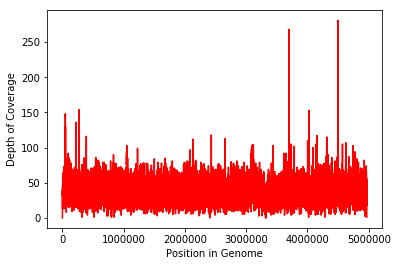

# Coverage statistics being calculated
Maximum coverage =  281
Minimum coverage =  0
Average coverage = 37.04

# Distribution of coverage depth being calculated


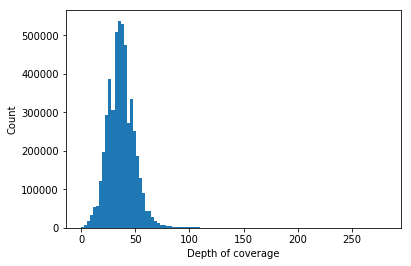

In [86]:
with open("Coverage_Plot/shewanella_pileup.tab") as f:
    name = "shewanella"
    coverage_plots(f, name)

### Human coverage plot - Extra credits

####  Coverage plot for whole human genome without zeros
Here we run the coverage_plot function on the pileup file obtained using samtools. The file does not indicate all positions which have no coverage.

**Note:** the average coverage value returned here is not representative since positions with non-zero coverage are not all taken into account.

# Depth of coverage per position being calculated


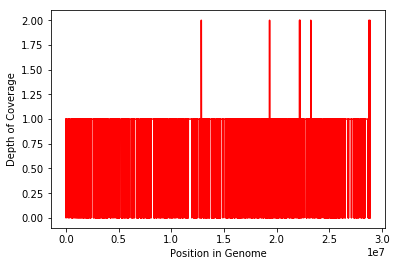

# Coverage statistics being calculated
Maximum coverage =  2
Minimum coverage =  0
Average coverage = 1.00

# Distribution of coverage depth being calculated


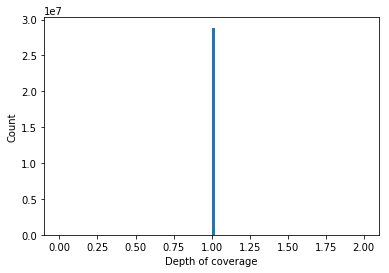

In [4]:
with open("Coverage_Plot_human/human_pileup_nozero.tab") as f:
    name = "human_nozero"
    coverage_plots(f, name)

####  Coverage plot for 3 chromosomes
Here we calculate the average coverage depth of chromosome 22, X and Y. Due to the size of the files, this can take several minutes.

##### WARNING: THIS WORKS ONE THE BIOE131.COM SERVER. ON OTHER SERVERS WITH INSUFFICIENT MEMORY THIS COULD OVERLOAD CRASH THE SERVER

GENERATING PLOTS FOR chr22
# Depth of coverage per position being calculated


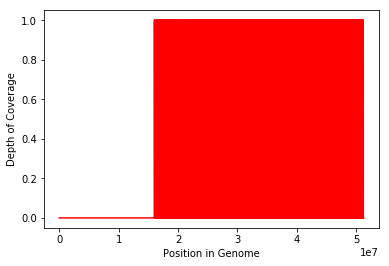

# Coverage statistics being calculated
Maximum coverage =  1
Minimum coverage =  0
Average coverage = 0.007

# Distribution of coverage depth being calculated


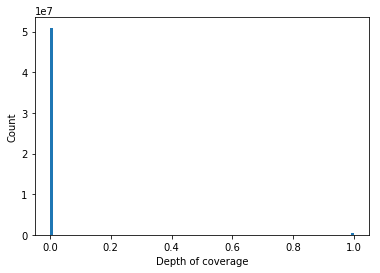


---------------------------------------------------------------------

GENERATING PLOTS FOR chrX
# Depth of coverage per position being calculated


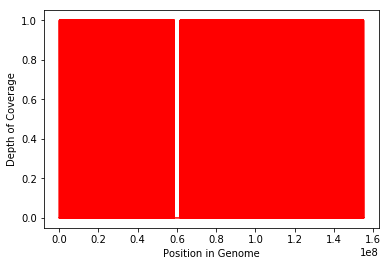

# Coverage statistics being calculated
Maximum coverage =  1
Minimum coverage =  0
Average coverage = 0.010

# Distribution of coverage depth being calculated


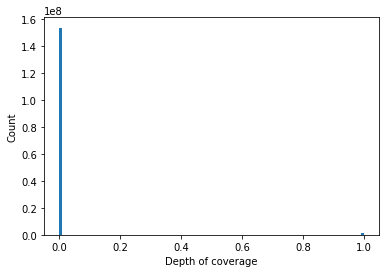


---------------------------------------------------------------------

GENERATING PLOTS FOR chrY
# Depth of coverage per position being calculated


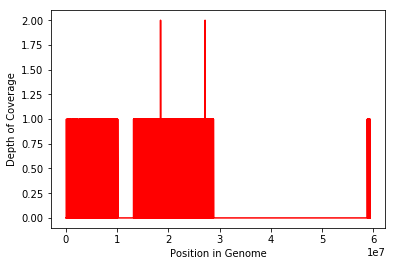

# Coverage statistics being calculated
Maximum coverage =  2
Minimum coverage =  0
Average coverage = 0.004

# Distribution of coverage depth being calculated


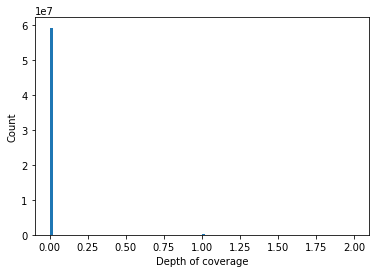


---------------------------------------------------------------------



In [18]:
chromosomes = ['chr22', 'chrX', 'chrY']
for c in chromosomes:
    print("GENERATING PLOTS FOR %s" %c)
    with open("Coverage_Plot_human/human_pileup_%s.tab" %c) as f:
        coverage_plots(f, c)
    print("\n---------------------------------------------------------------------\n")

#### Average coverage for 3 chromosomes
Here we calculate the average coverage depth of chromosome 22, X and Y. Due to the size of the files, this can take several minutes.

In [22]:
def avg_depth(file):
    """ Calculates the average depth of coverage for a given file. """
    
    # total_p is the total number of positions in the file, total_d is the cumulated depth
    total_p = 0
    total_d = 0
    reader = csv.reader(file, delimiter="\t")
    for row in reader:
        total_p += 1
        total_d += int(row[2])
    return total_d/total_p

CALCULATING AVERAGE FOR chr22
Average depth of coverage in chr22 : 0.6868%

---------------------------------------------------------------------

CALCULATING AVERAGE FOR chrX
Average depth of coverage in chrX : 0.9715%

---------------------------------------------------------------------

CALCULATING AVERAGE FOR chrY
Average depth of coverage in chrY : 0.4118%

---------------------------------------------------------------------



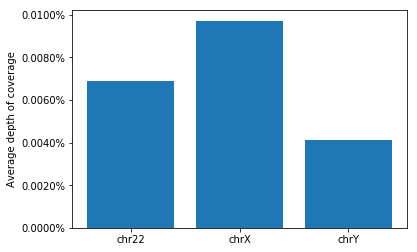

In [88]:
# chromosomes contains the chromosomes of interest
chromosomes = ['chr22', 'chrX', 'chrY']

# chr_avg will contain the average for each chromosome
chr_avg = []

for c in chromosomes:
    print("CALCULATING AVERAGE FOR %s" %c)
    with open("Coverage_Plot_human/human_pileup_%s.tab" %c) as f:
        avg = avg_depth(f)
        chr_avg.append(avg)
        print("Average depth of coverage in %s : %s" %(c, "{:.4%}".format(avg)))
    print("\n---------------------------------------------------------------------\n")
    
# Generate bar plot
lab = np.arange(len(chromosomes))
plt.bar(lab, chr_avg)
plt.xticks(lab, chromosomes)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Average depth of coverage")
plt.savefig("IMG/average_depth_chromosome.png")
plt.show()

#### Zooming in on high coverage regions
Here we identify the regions that have higher coverage than average. Given previous results, we will look at sequences of 20 or more nucleotides which have a coverage of 2. We will therefore focus on chromosome Y.

In [6]:
def high_coverage_region(file):
    """ Returns a list of indices pairs (i,j) such that j>=i+20 and the coverage of all positions
    from i to j is equal to 2. """
    
    min_length = 20
    
    indices = []
    reader = csv.reader(file, delimiter="\t")
    
    # i is the position being investigated
    # if postion i has a coverage of 2 imem the smallest position such that positions from imem to i all have a coverage of 2
    i = 1
    imem = 1

    for row in reader:
        i+=1
        # if the position does not have a coverage of 2
        if not(int(row[2])==2):
            # check if continuous sequence of coverage 2 is larger that min_length
            if (i-imem)>min_length:
                indices.append((imem,i))
            imem = i

    return indices

In [16]:
with open("Coverage_Plot_human/human_pileup_chrY.tab") as f:
    region = high_coverage_region(f)
    print("High coverage regions in chrY: ", region)

High coverage regions in chrY:  [(18485047, 18485210), (27170225, 27170466)]
